# Employee Future Prediction

Predict Employee Future In Company

# About Dataset

The HR department of a business is attempting to forecast whether some customers would leave the company over the next two years. This is an intriguing investigation that could assist future businesses in developing workflows and making decisions to keep their most valued employees in their organization.

Perform EDA and bring out insights.

# Table of Contents

1. Data Preprocessing Part
2. Exploratory Data Analysis
3. Train Test Split
4. Decision Tree
5. Random Forest
6. Logistic Regression
7. K-Nearest Neighbors algorithm (KNN)
8. Support Vector Classifier (SVC)
9. Some Business questions

In [160]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import math 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [49]:
# Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

# Reading and understanding the data

In [50]:
# Load the dataset
df = pd.read_csv("Employee.csv")

# Get the first five rows of the dataset
df.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [51]:
# Get the last five rows of the dataset
df.tail()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  
4648                          4           0  
4649                          2           1  
4650                          5           1  
4651                          2           0  
4652                          4           0

# Explaining what each column means

- Education : The highest level of formal education obtianed by the employee
- JoiningYear : Year of joining the company
- City : Job Location
- PaymentTier : [1:3] -> 1 means better payment
- Age : Age of the employee
- Gender : Gender of the employee
- EverBenched : Ever kept out of project for more than one month
- ExperienceInCurrentDomain : Experience in current field
- LeaveOrNot : Whether the employee leaves the company in next 2 years

# 1. Data Preprocessing Part

# Data Cleaning

Descriptive Statistics

In [52]:
# get dataframe dimensions
print("Database dimension     :",df.shape)
print("Database size          :",df.size)

# get info about the dataframe (columns,entries,datatype etc...)
df.info()     

# describe the dataframe and get statistics
df.describe()

Database dimension     : (4653, 9)
Database size          : 41877
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4653.000000  
mean      0.343864  
std       0.475047  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

# 1.1 Missing Values

In [53]:
# Missing data
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# 1.2 Duplicated Values

In [54]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
df.duplicated().sum()

1889

In [55]:
#Dropping duplicate values, but one value from each remains
df.drop_duplicates(inplace=True)

In [56]:
#Checking duplicated values again
df.duplicated().sum()

0

# Get the descriptive analysis of the dataframe after removing duplicates

In [84]:
# get dataframe dimensions
print("Database dimension     :",df.shape)
print("Database size          :",df.size)

# get info about the dataframe (columns,entries,datatype etc...)
df.info()     

# describe the dataframe and get statistics
df.describe()

Database dimension     : (2764, 10)
Database size          : 27640
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 4651
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   int64 
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   int64 
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   int64 
 6   EverBenched                2764 non-null   int64 
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   object
 9   HiredYears                 2764 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 302.1+ KB


Education  JoiningYear         City  PaymentTier          Age  \
count  2764.000000  2764.000000  2764.000000  2764.000000  2764.000000   
mean      0.343343  2015.090449     0.866136     2.636035    30.952967   
std       0.581774     1.885943     0.834141     0.624001     5.108872   
min       0.000000  2012.000000     0.000000     1.000000    22.000000   
25%       0.000000  2013.000000     0.000000     2.000000    27.000000   
50%       0.000000  2015.000000     1.000000     3.000000    30.000000   
75%       1.000000  2017.000000     2.000000     3.000000    35.000000   
max       2.000000  2018.000000     2.000000     3.000000    41.000000   

            Gender  EverBenched  ExperienceInCurrentDomain   HiredYears  
count  2764.000000  2764.000000                2764.000000  2764.000000  
mean      0.553184     0.130608                   2.644356     2.909551  
std       0.497253     0.337032                   1.610610     1.885943  
min       0.000000     0.000000                   0.000000     0.000000  
25%       0.000000     0.000000                   1.000000     1.000000  
50%       1.000000     0.000000                   2.000000     3.000000  
75%       1.000000     0.000000                   4.000000     5.000000  
max       1.000000     1.000000                   7.000000     6.000000

# 2. Exploratory Data Analysis

# Exploring Data:

In the table there are 4653 entries that mean the number of employee registration, where 5 of these are of type int and 4 of type object, also there are no missing values.

1889 duplicate data were found, but despite this, imagine a scenario where this data is not because a single employee has many records but there are several employees who had similar characteristics, then if so, these characteristics would represent an important pattern for the analysis.

Some information:
- Emmployees ages are ranging from [22:41] and most of them are around age 28
- Experience years ranging from [0:7]
- JoiningYears are ranging from [2012:2018]

In [57]:
df.select_dtypes(include='object').nunique()

Education      3
City           3
Gender         2
EverBenched    2
dtype: int64

# Adding "HiredYears" for better insights

In [58]:
df['HiredYears']=max(df['JoiningYear'])- df['JoiningYear']
df.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  HiredYears  
0                          0           0           1  
1                          3           1           5  
2                          2           0           4  
3                          5           1           2  
4                          2           1           1

# Changing type of data for better understanding

In [59]:

# Change the data type to string
df['LeaveOrNot'] = df['LeaveOrNot'].astype(str)
# Change 1 to yes and 0 to no for visualization
df['LeaveOrNot'] = df['LeaveOrNot'].map({'1': 'yes', '0': 'no'})

df.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain LeaveOrNot  HiredYears  
0                          0         no           1  
1                          3        yes           5  
2                          2         no           4  
3                          5        yes           2  
4                          2        yes           1

Some noticable information:
- The company has started hiring in 2012 and last recorded data was in 2018.
- Highest hiring rate was in 2017 and lowest was in 2018.
- 'New Delhi' has the lowset hiring rate in all years, but surprisingly it has the highest rate in 2018.
- 'Bangalore' has the highest hiring rate in almost all years.

# Data Visualization

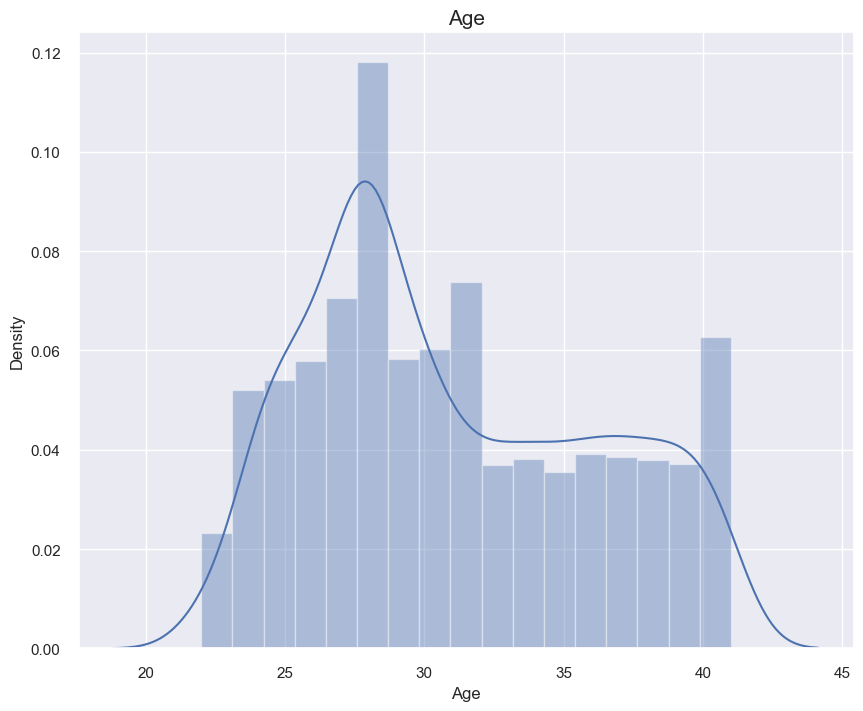

In [70]:
plt.figure(figsize=(10,8))
sns.distplot(df["Age"])
plt.title("Age", size=15)
plt.show()

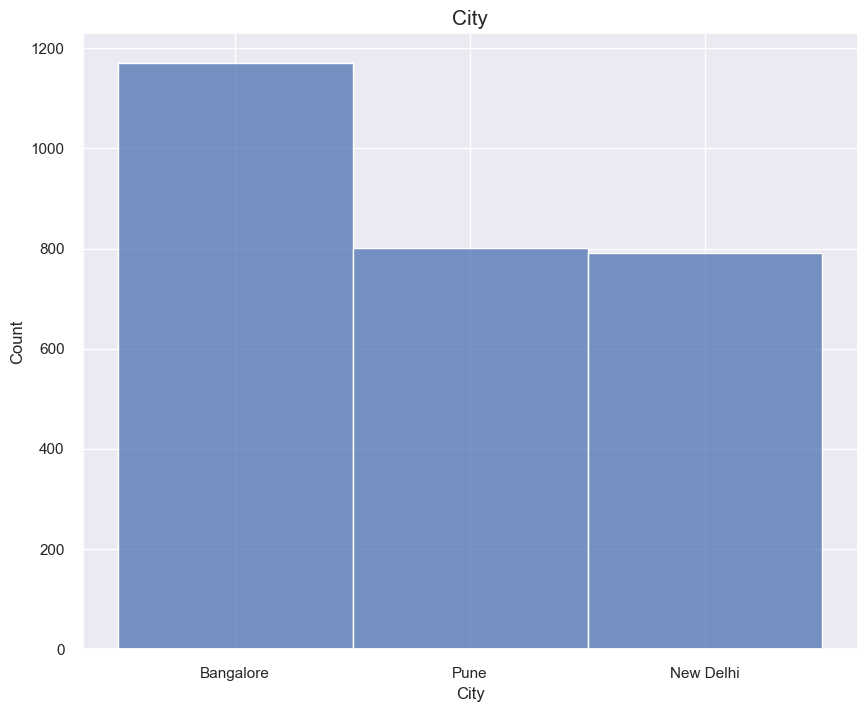

In [75]:
plt.figure(figsize=(10,8))
sns.histplot(df["City"])
plt.title("City", size=15)
plt.show()

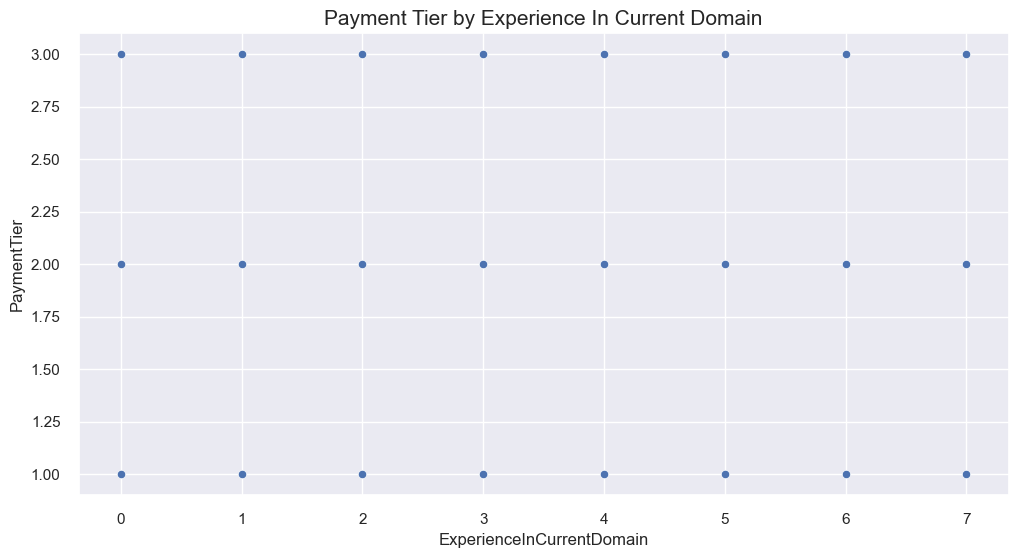

In [76]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["ExperienceInCurrentDomain"],y=df["PaymentTier"])
plt.title("Payment Tier by Experience In Current Domain", size=15)
plt.show()

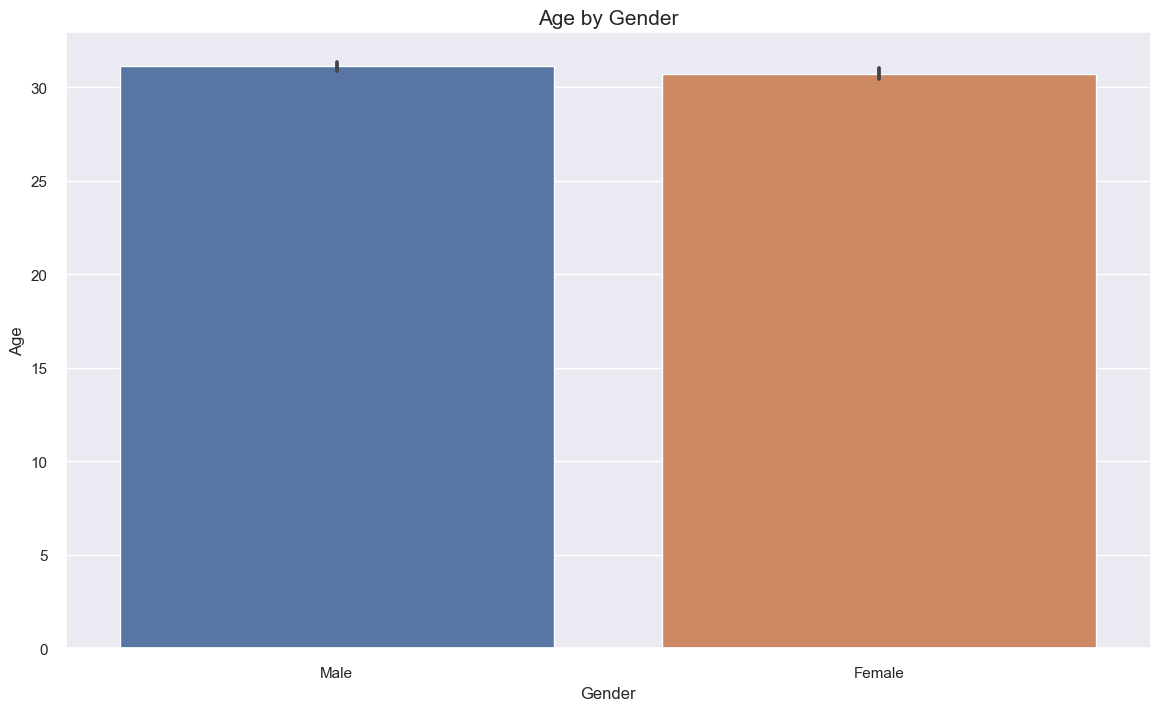

In [77]:
plt.figure(figsize=(14,8))
sns.barplot(x=df["Gender"],y=df["Age"])
plt.title("Age by Gender", size=15)
plt.show()

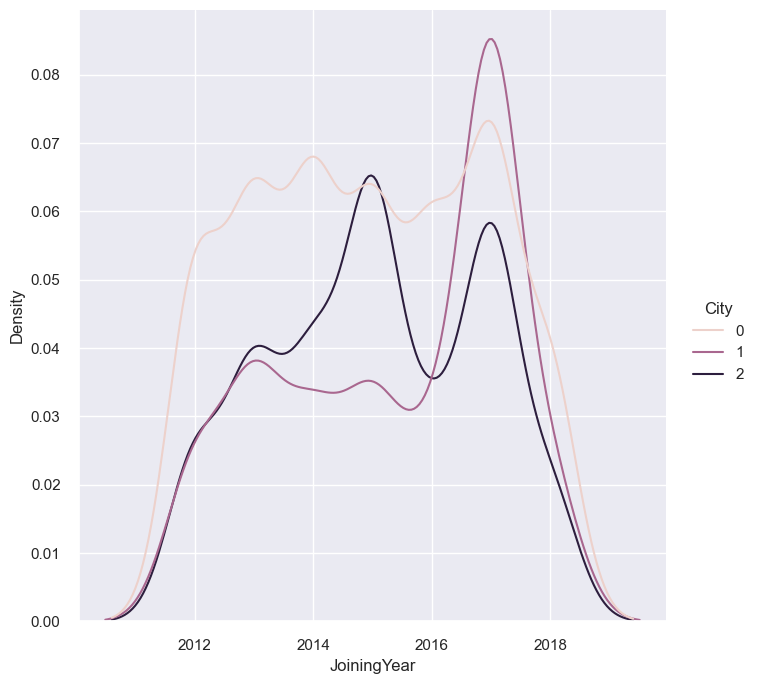

In [157]:
sns.displot(data=df, x="JoiningYear", hue="City", kind="kde",height=7)

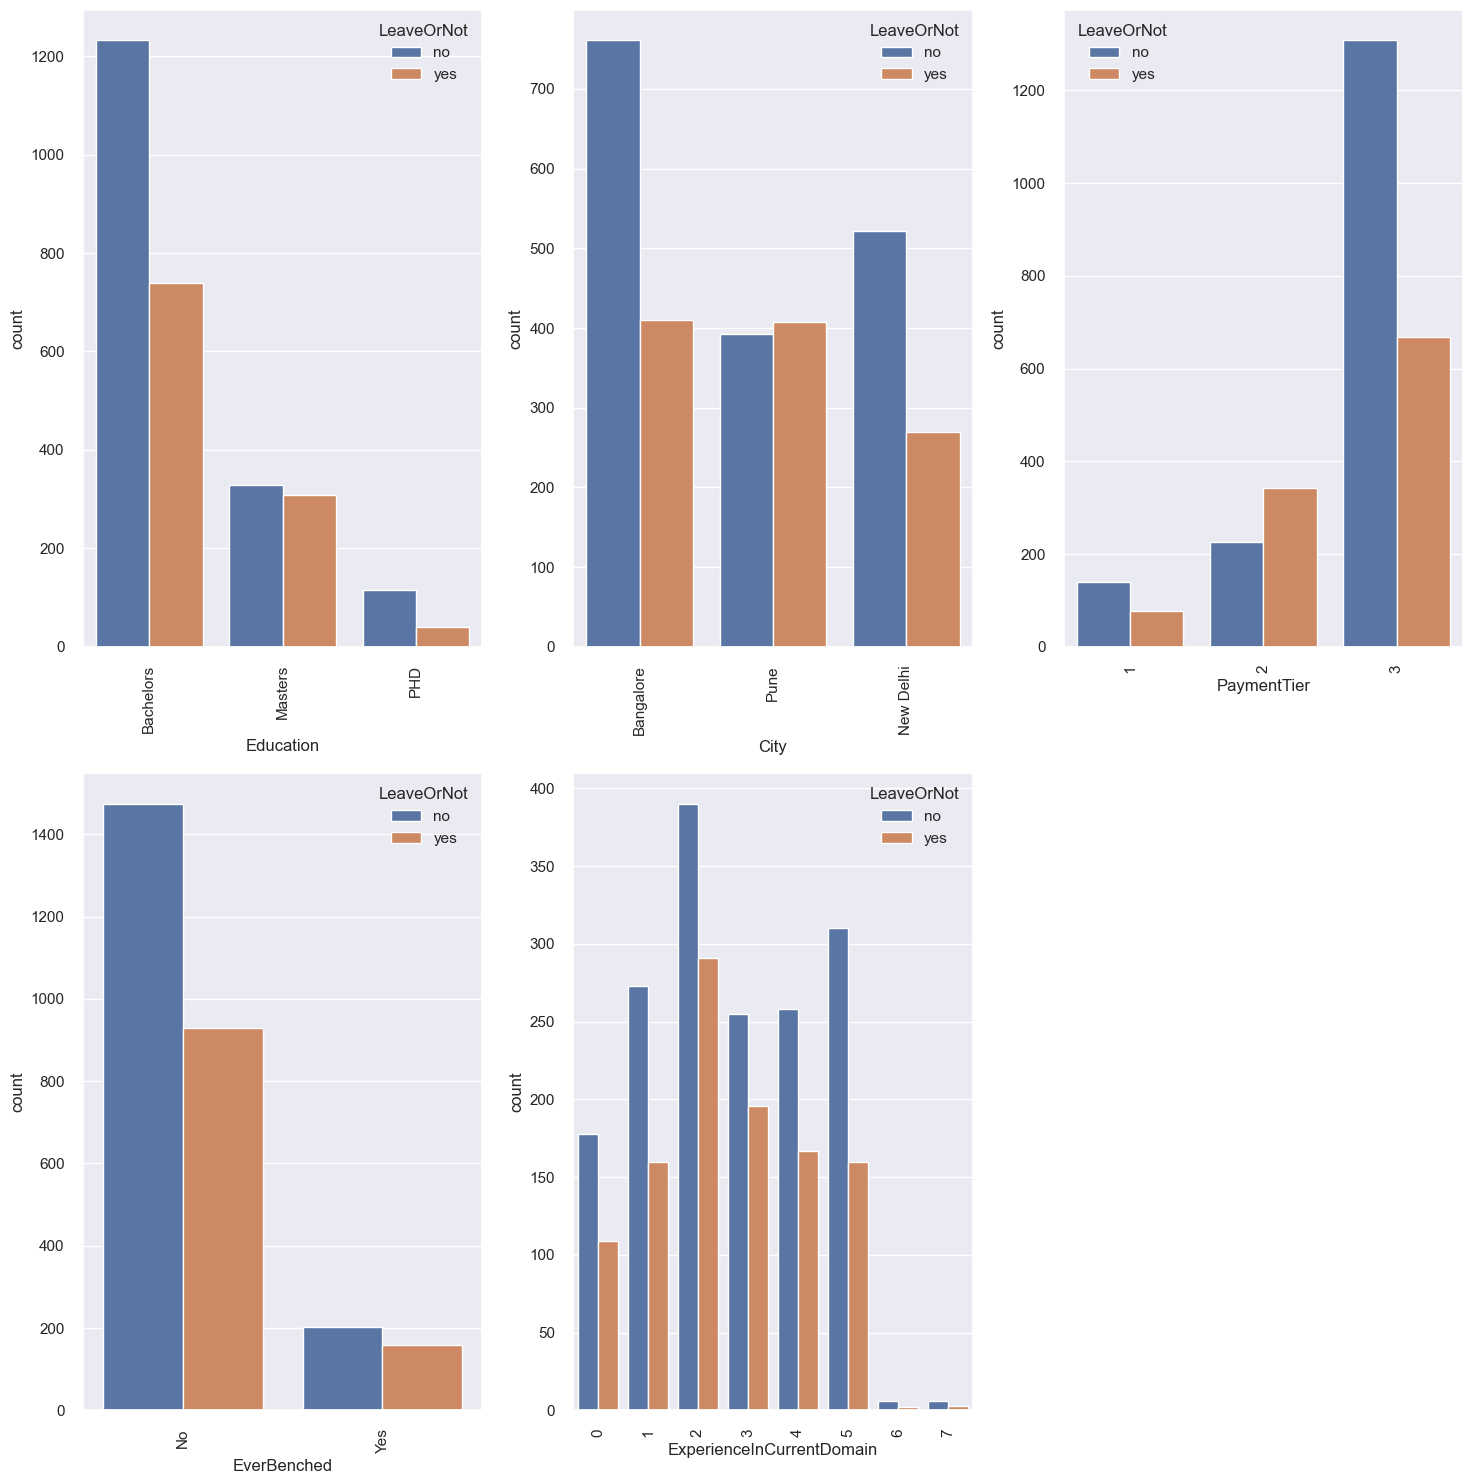

In [65]:
# list of categorical variables to plot
cat_vars = ['Education', 'City', 'PaymentTier', 'EverBenched', 'ExperienceInCurrentDomain']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='LeaveOrNot', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

# show plot
plt.show()

<Axes: xlabel='JoiningYear', ylabel='count'>

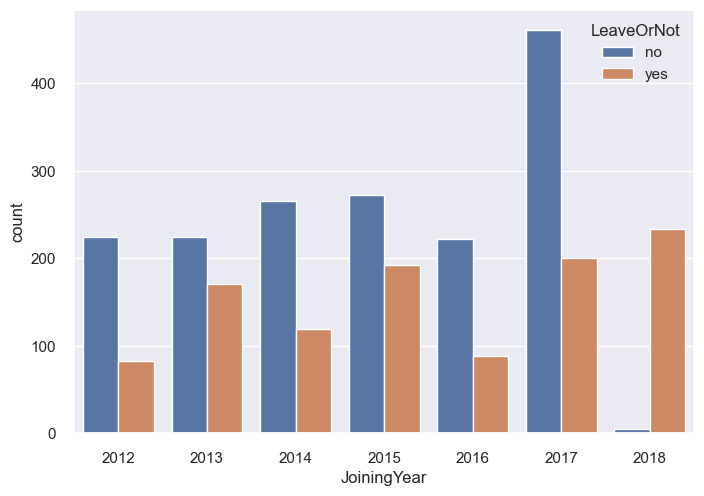

In [66]:
sns.countplot(x='JoiningYear', hue='LeaveOrNot', data=df)

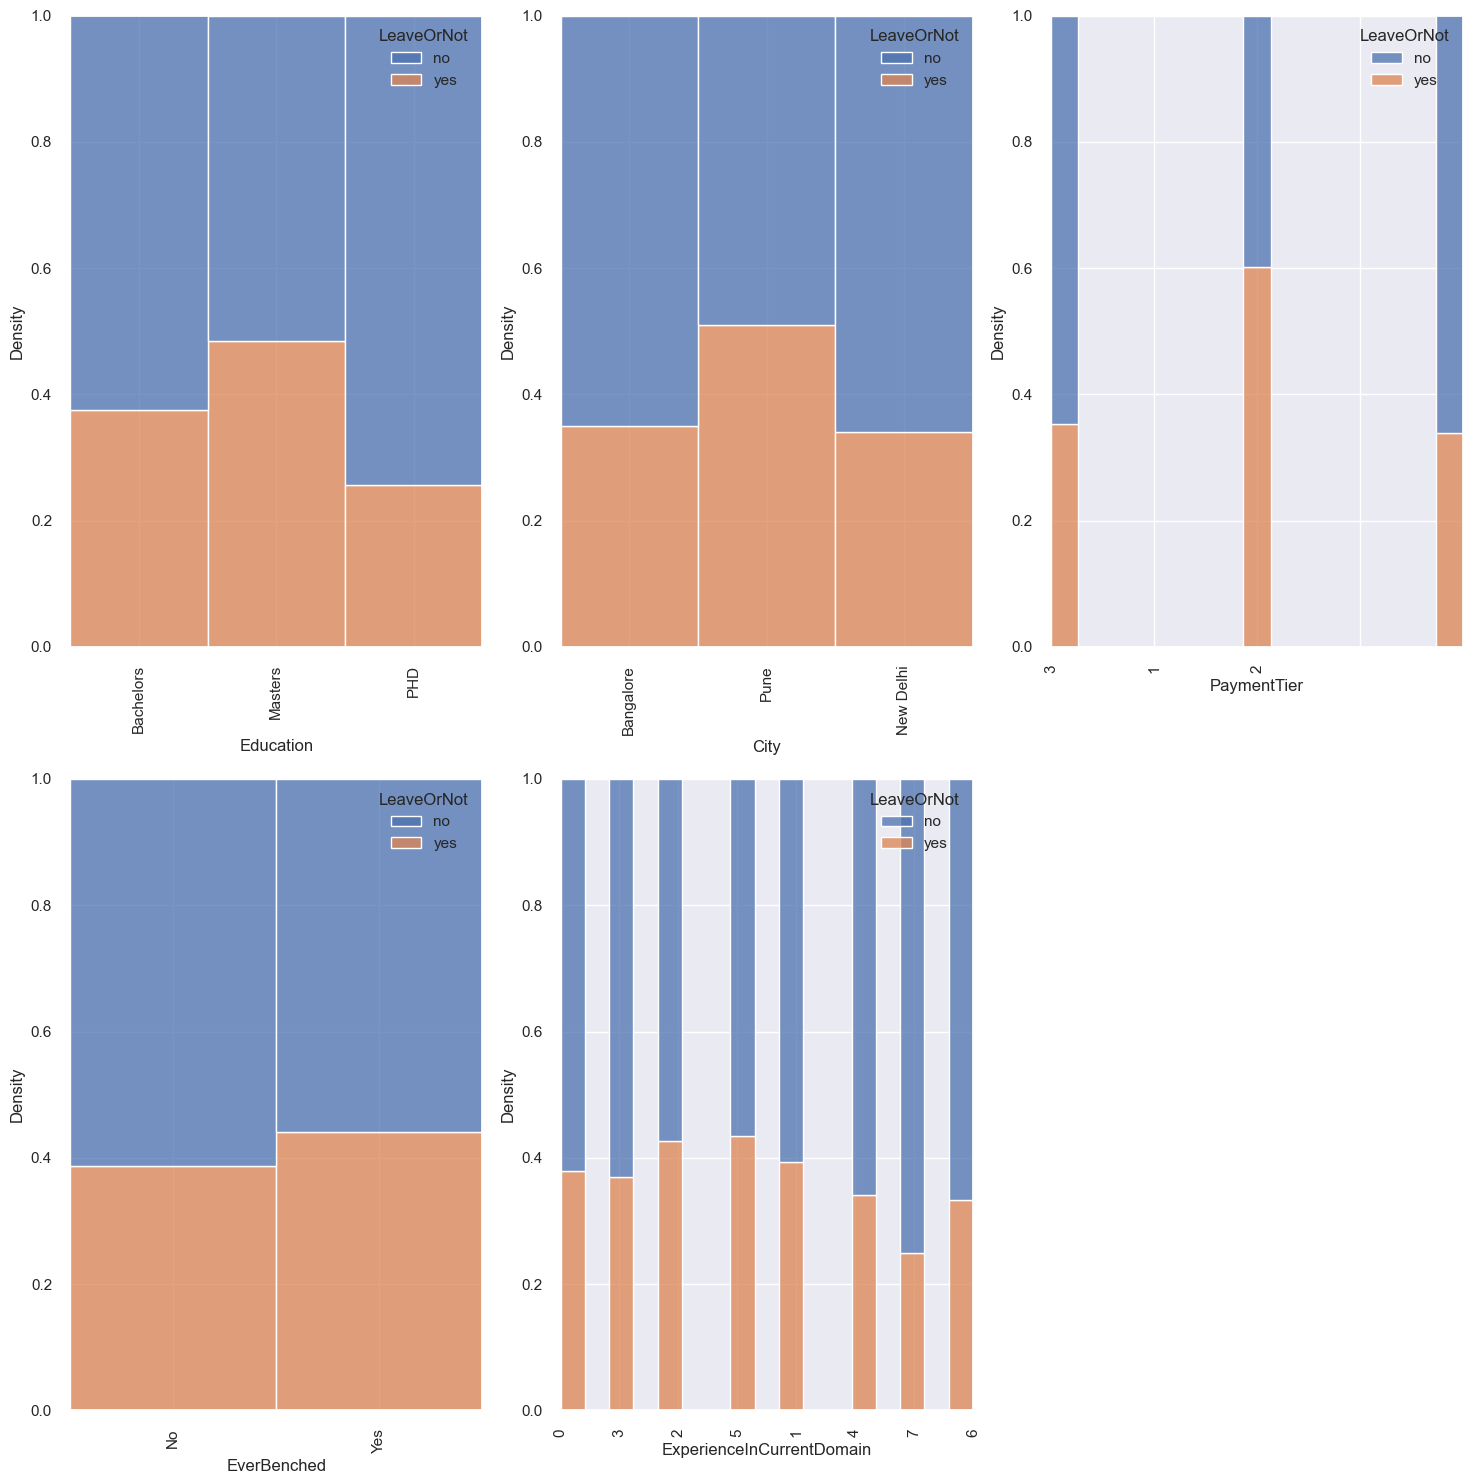

In [61]:
# get list of categorical variables
cat_vars = ['Education', 'City', 'PaymentTier', 'EverBenched', 'ExperienceInCurrentDomain']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='LeaveOrNot', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

# show plot
plt.show()

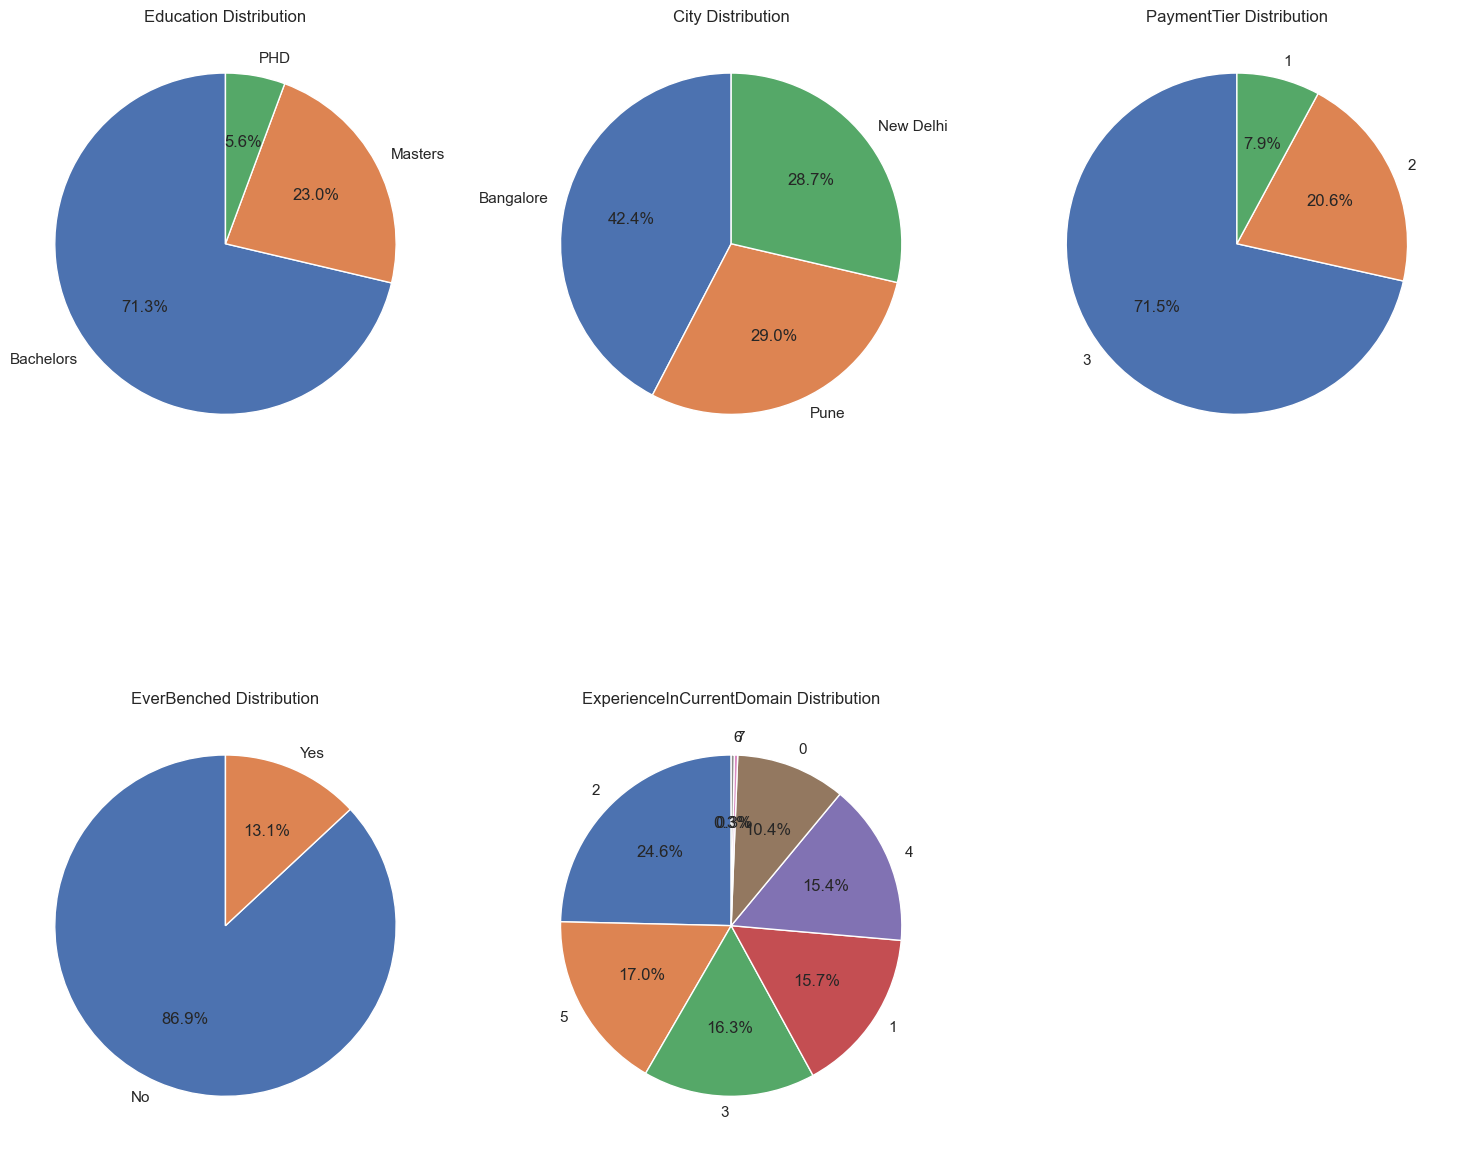

In [62]:
cat_vars = ['Education', 'City', 'PaymentTier', 'EverBenched', 'ExperienceInCurrentDomain']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()
fig.delaxes(axs[1][2])
# show the plot
plt.show()

<Axes: xlabel='Age'>

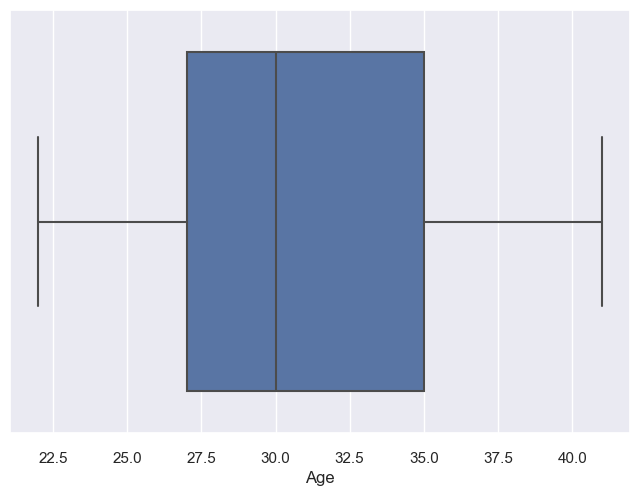

In [63]:
sns.boxplot(x='Age', data=df)

<Axes: xlabel='Age', ylabel='LeaveOrNot'>

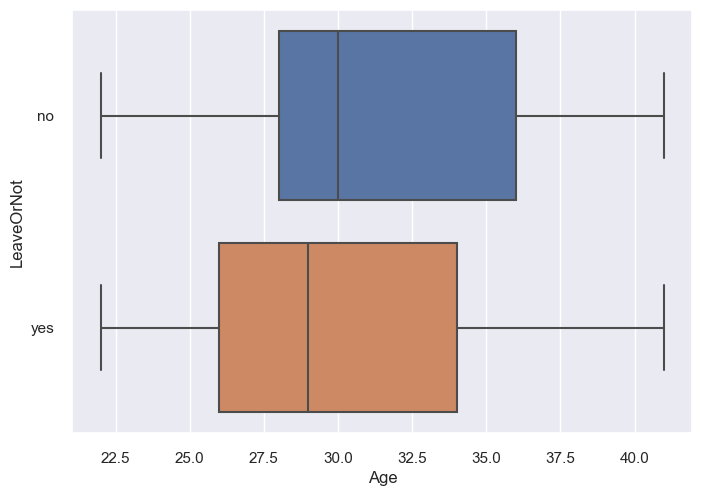

In [67]:
sns.boxplot(x='Age', data=df, y='LeaveOrNot')

<Axes: xlabel='Age'>

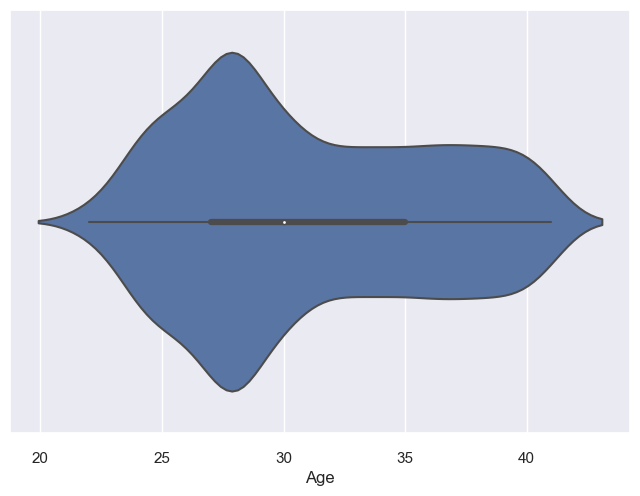

In [68]:
sns.violinplot(x='Age', data=df)

<Axes: xlabel='Age', ylabel='LeaveOrNot'>

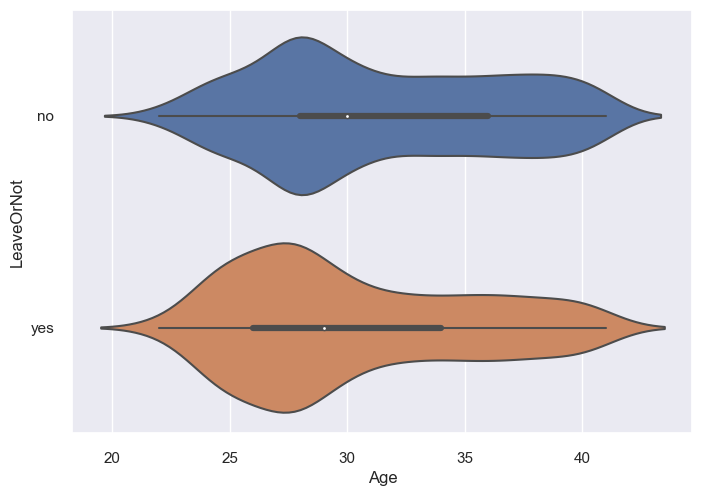

In [69]:
sns.violinplot(x='Age', data=df, y='LeaveOrNot')

# Focusing data exploration

# Label Encoding for Object datatypes

Handling Categorical Variables

In [98]:
encoder = LabelEncoder()
columns = ["Education","EverBenched","Gender","City"]
for cols in columns:
    df[cols] = encoder.fit_transform(df[cols])
    
df.head()

Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
0          0         2017     0            3   34       1            0   
1          0         2013     2            1   28       0            0   
2          0         2014     1            3   38       0            0   
3          1         2016     0            3   27       1            0   
4          1         2017     2            3   24       1            1   

   ExperienceInCurrentDomain  LeaveOrNot  HiredYears  
0                          0           0           1  
1                          3           1           5  
2                          2           0           4  
3                          5           1           2  
4                          2           1           1

In [99]:
df.tail()

Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
4645          1         2017     2            2   31       0            0   
4647          0         2016     2            3   30       1            0   
4649          1         2013     2            2   37       1            0   
4650          1         2018     1            3   27       1            0   
4651          0         2012     0            3   30       1            1   

      ExperienceInCurrentDomain  LeaveOrNot  HiredYears  
4645                          2           0           1  
4647                          2           0           2  
4649                          2           1           5  
4650                          5           1           0  
4651                          2           0           6

1. Education: Bachelors = 0; Masters = 1; PHD = 2
2. City: Bangalore = 0; Pune = 1; New Delhi = 2
3. Gender: Female = 0; Male = 1
4. EverBenched: no = 0; yes = 1
5. LeaveOrNot: no = 0; yes = 1

Taking into account that the objective is to predict if any client will leave the company within two years, it is identified that one of the most important columns is LeaveOrNot.

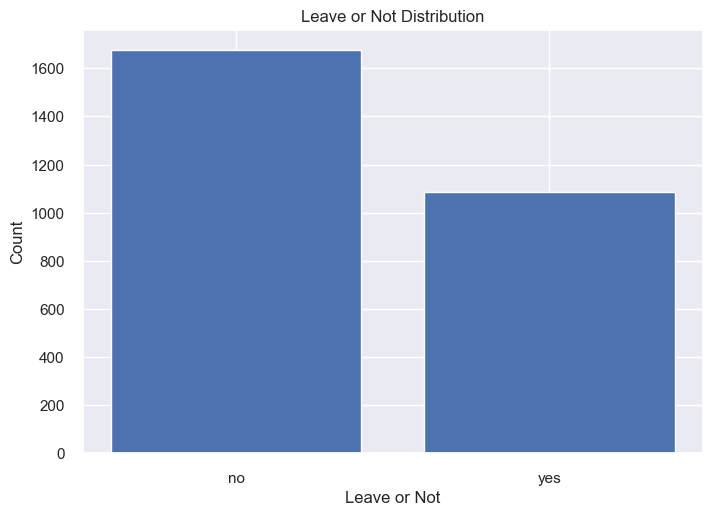

no     1676
yes    1088
Name: LeaveOrNot, dtype: int64


In [83]:
leaveornot_counts = df['LeaveOrNot'].value_counts()

plt.bar(leaveornot_counts.index, leaveornot_counts.values)  

plt.xticks(leaveornot_counts.index, 
           [str(leaveornot) for leaveornot in leaveornot_counts.index])

plt.xlabel('Leave or Not')
plt.ylabel('Count')
plt.title('Leave or Not Distribution')
plt.show()

print(leaveornot_counts)

With respect to this column it is found that, of total registrations (2 764):

-There are 1 088 people who have left the company
-There are 1 676 employees

# Correlation Heatmap

<Axes: >

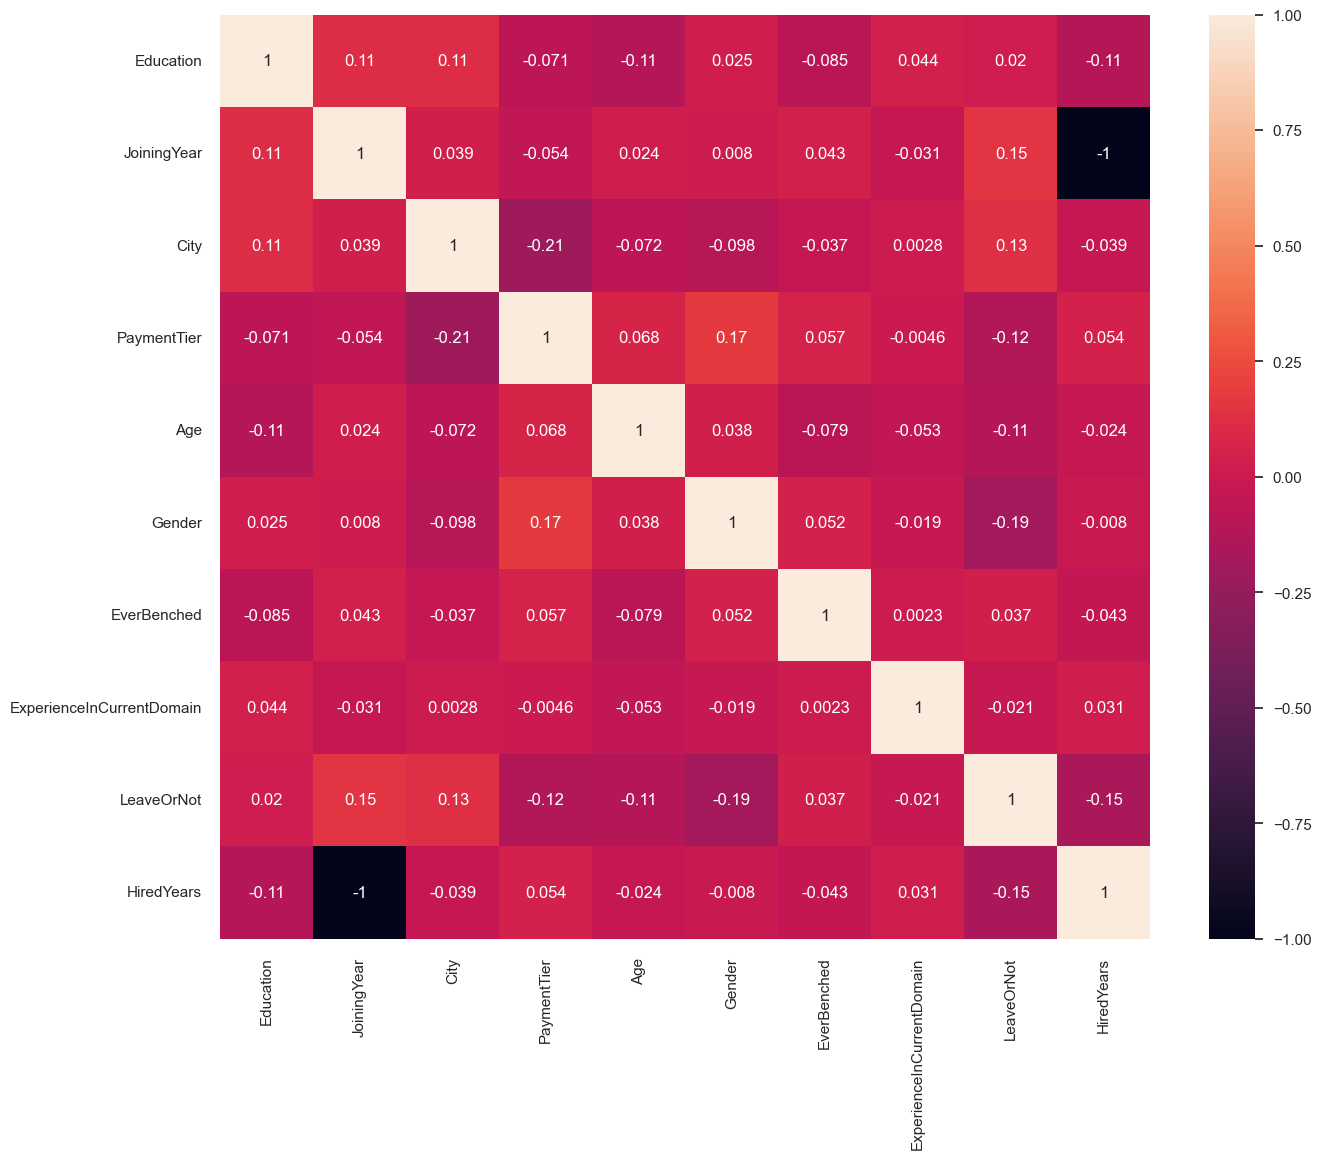

In [96]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

Now emphasizing the LeaveOrNot variable, it can be seen in the following graph the following significant correlations:

- A direct correlation with Joiningyear:0.15
- An inverse correlation with Gender:-0.12

# JoiningYear

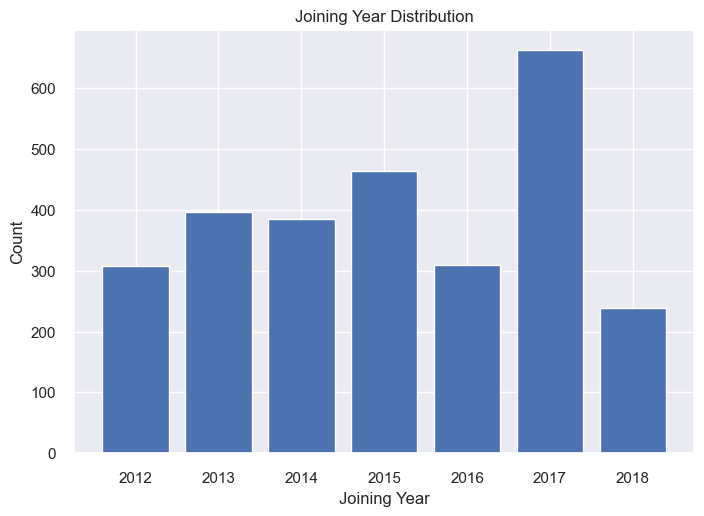

2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64


In [90]:
joiningyear_counts = df['JoiningYear'].value_counts()

plt.bar(joiningyear_counts.index, joiningyear_counts.values)  

plt.xticks(joiningyear_counts.index, [str(year) for year in joiningyear_counts.index])

plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.title('Joining Year Distribution')

plt.show()

print(joiningyear_counts)

The variable with which LeaveOrNot has a direct correlation is explored below, that is, JoningYear. Regarding JoiningYear it is found that

- 662 employees joined the company in 2017
- 464 employees joined the company in 2015
- 396 employees joined the company in 2013
- 385 employees joined the company in 2014
- 310 employees joined the company in 2016
- 308 employees joined the company in 2012
- 239 employees joined the company in 2018

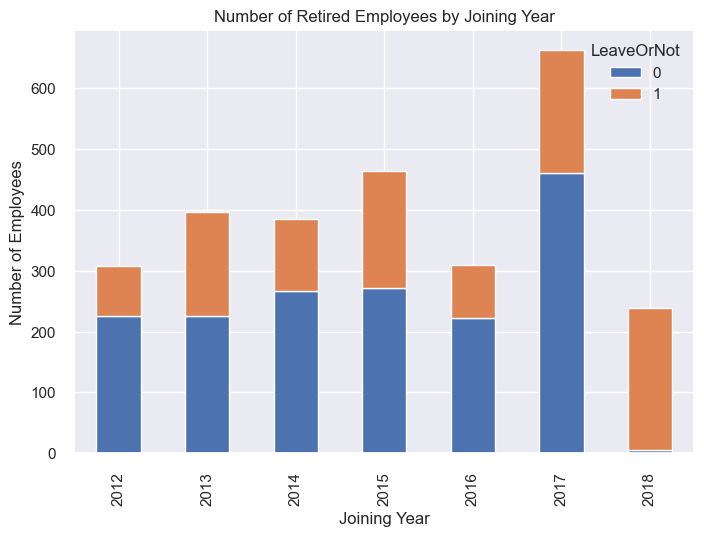

             LeaveOrNot
JoiningYear            
2012                 83
2013                171
2014                119
2015                192
2016                 88
2017                201
2018                234


In [94]:
grouped = df.groupby(['JoiningYear', 'LeaveOrNot']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True)
ax.set_xlabel('Joining Year')
ax.set_ylabel('Number of Employees')
ax.set_title('Number of Retired Employees by Joining Year')
plt.show()

corr_YearLeave=df.groupby(['JoiningYear'])[['LeaveOrNot']].sum()
print(corr_YearLeave)

You can see in the following graph the relationship between joiningYear and LeaveOrNot. It's found that among the most important values that:

- 234 people who joined in 2018, after 2 years left their job
- 192 people who joined in 2015, after 2 years left their job
- 201 people who joined in 2017, after 2 years left their job

Now, let's remember...

- In 2018, 239 people joined the company and of this total for this same year, 234 left the company within two years.
- In 2015, 464 people joined the company and of this total for this same year, 192 left the company within two years.
- In 2017, 662 people joined the company and of this total for this same year, 201 left the company within two years.

# Payment Tier

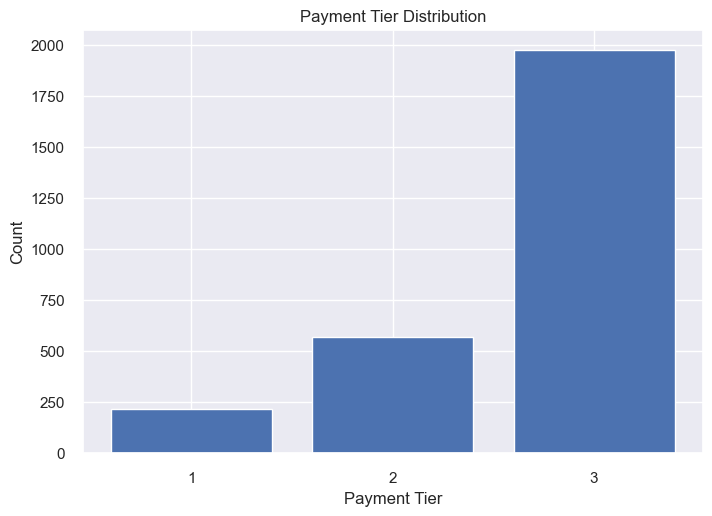

3    1976
2     570
1     218
Name: PaymentTier, dtype: int64


In [101]:
payment_counts = df['PaymentTier'].value_counts()

plt.bar(payment_counts.index, payment_counts.values)  

plt.xticks(payment_counts.index, [str(payment) for payment in payment_counts.index])
plt.xlabel('Payment Tier')
plt.ylabel('Count')
plt.title('Payment Tier Distribution')

plt.show()
print(payment_counts)

PaymentTier was another of the variables that correlated with LeaveOrNot, so the following is found:

- 1976 people have a basic payment level-3
- 570people have a medium payment level-2
- 218 people have a high payment level-1

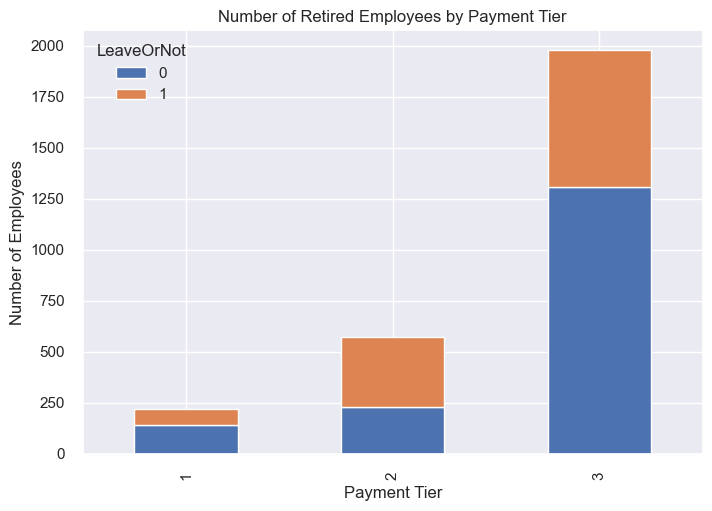

             LeaveOrNot
PaymentTier            
1                    77
2                   343
3                   668


In [102]:
grouped = df.groupby(['PaymentTier', 'LeaveOrNot']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True)
ax.set_xlabel('Payment Tier')
ax.set_ylabel('Number of Employees')
ax.set_title('Number of Retired Employees by Payment Tier')
plt.show()

corr_paymentLeave=df.groupby(['PaymentTier'])[['LeaveOrNot']].sum()
print(corr_paymentLeave)


The paymentTier and LeaveOrNot data is shown below. It is found that:

- 668 people receiving basic pay left the company within 2 years
- 434 people receiving basic pay left the company within 2 years
- 77 people receiving basic pay left the company within 2 years

In [104]:
totalEmployee_BS = 1976
dropoutEmployee_BS = 668
dropout_rateBS = (dropoutEmployee_BS / totalEmployee_BS) * 100

totalEmployee_MS = 570
dropoutEmployee_MS = 343
dropout_rateMS = (dropoutEmployee_MS / totalEmployee_MS) * 100

totalEmployee_HS = 218
dropoutEmployee_HS = 77
dropout_rateHS = (dropoutEmployee_HS / totalEmployee_HS) * 100

print("The dropout rate for basic salary employees is:", dropout_rateBS, "%")
print("The dropout rate for medium salary employees is:", dropout_rateMS, "%")
print("The dropout rate for high salary employees is:", dropout_rateHS, "%")

The dropout rate for basic salary employees is: 33.80566801619433 %
The dropout rate for medium salary employees is: 60.175438596491226 %
The dropout rate for high salary employees is: 35.321100917431195 %


Now let's remember...

- Of 1976 registered people receiving a basic salary, 668 retired within two years, then the drop rate is 33.81%.
- Of 570 registered people receiving a medium salary, 343 retired within two years,then the drop rate is 60.18%.
- Of 218 registered people receiving a high salary, 77 retired within two years, then the drop rate is 35.32%.

The variables that had a significant correlation with LeaveOrNo have been explored, now the relationship that LeaveOrNot not may have with Education, City, Gender and EverBenched.

# Education

0    1971
1     637
2     156
Name: Education, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

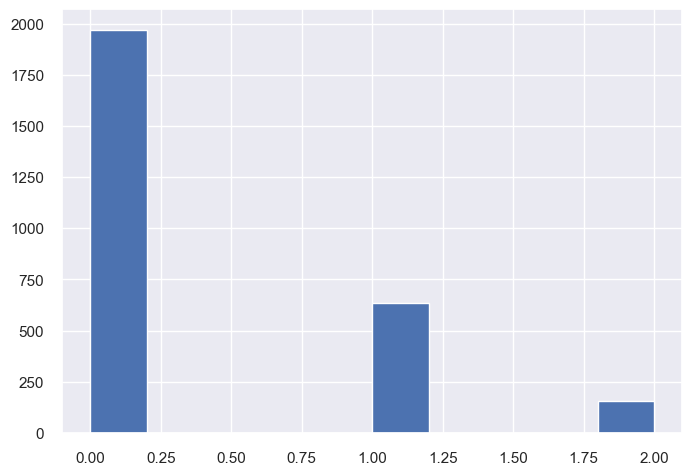

In [105]:
education_counts = df['Education'].value_counts()
print(education_counts)

Edu = df['Education']
plt.hist(Edu)
plt.show

Education: The data and the graph indicate that there are:

- 1971 records of employees with a bachelor's degree.
- 637 records of employees with a master's degree.
- 156 records of employees with a PHD's degree.

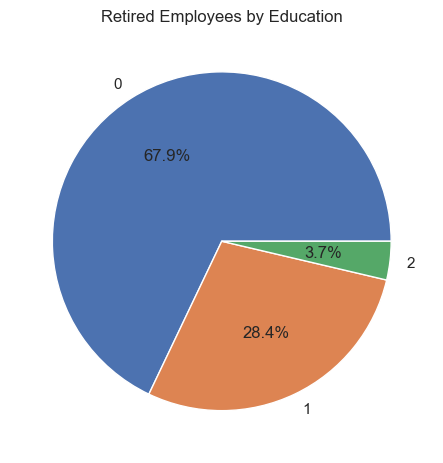

           LeaveOrNot
Education            
0                 739
1                 309
2                  40


In [106]:
retired_df = df[df['LeaveOrNot'] == 1]

leave_counts = retired_df.groupby('Education')['LeaveOrNot'].count()

plt.pie(leave_counts, labels=leave_counts.index, autopct='%1.1f%%')
plt.title('Retired Employees by Education')
plt.show()

corr_eduLeave=df.groupby(['Education'])[['LeaveOrNot']].sum()
print(corr_eduLeave)

According to the education graph in conjunction with leaveOrNot, it is found:

- Of 1088 employees who retired within two years, 739 have a bachelor's degree.
- Of 1088 employees who retired within two years, 309 have a master's degree.
- Of 1088 employees who retired within two years, 40 have a PHD degree.

In [107]:
totalLeave_B = 1971
dropoutLeave_B = 739
dropout_rateB = (dropoutLeave_B / totalLeave_B) * 100

totalLeave_M = 637
dropoutLeave_M = 309
dropout_rateM = (dropoutLeave_M / totalLeave_M) * 100

totalLeave_P = 156
dropoutLeave_P = 40
dropout_rateP = (dropoutLeave_P / totalLeave_P) * 100

print("The bachelor's dropout rate is:", dropout_rateB, "%")
print("The master's dropout rate is:", dropout_rateM, "%")
print("The PHD's dropout rate is:", dropout_rateP, "%")

The bachelor's dropout rate is: 37.49365804160325 %
The master's dropout rate is: 48.50863422291994 %
The PHD's dropout rate is: 25.64102564102564 %


Now let's remember...

- Of 2764 records in total, 1971 employees have a bachelor's degree, and of this amount, 739 left the company within 2 years. Dropout rate is: 37.49%.
- Of 2764 records in total, 637 employees have a master's degree, and of this amount, 309 left the company within 2 years. Dropout rate is: 48.51%.
- Of 2764 records in total, 156 employees have a PHD degree, and of this amount, 40 left the company within 2 years. Dropout rate is: 25.64%.

# EverBenched

0    2403
1     361
Name: EverBenched, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

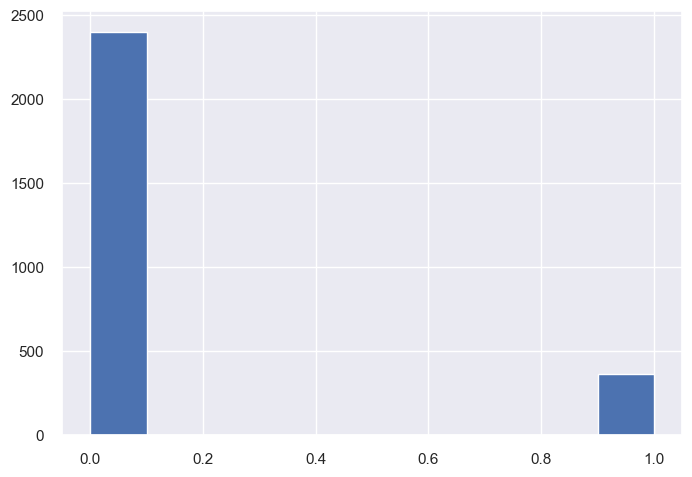

In [108]:
everbenched_counts = df['EverBenched'].value_counts()
print(everbenched_counts)

everBenched = df['EverBenched']
plt.hist(everBenched)
plt.show

EverBenched:The data and the graph indicate that there are:

- 361 employees have ever been off projects for 1 month or more.
- 2 403 employees were always in the projects.

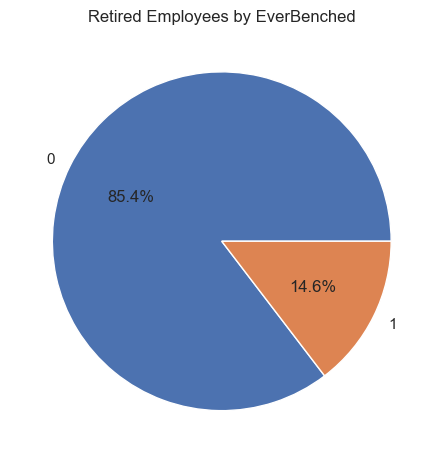

             LeaveOrNot
EverBenched            
0                   929
1                   159


In [110]:
retired_df = df[df['LeaveOrNot'] == 1]

leave_counts = retired_df.groupby('EverBenched')['LeaveOrNot'].count()

plt.pie(leave_counts, labels=leave_counts.index, autopct='%1.1f%%')
plt.title('Retired Employees by EverBenched')
plt.show()

corr_everBenched=df.groupby(['EverBenched'])[['LeaveOrNot']].sum()
print(corr_everBenched)

According to the EverBenched graph in conjunction with leaveOrNot, it is found:

- Of 1088 records of employees who left the company within 2 years, 929 were employees who had always been in a project.
- of 1088 records of employees who left the company within 2 years, 159 were employees who had ever been away from projects.

In [111]:
totalLeave_EB = 361
dropoutLeave_EB = 159
dropout_rateEB = (dropoutLeave_EB / totalLeave_EB) * 100

totalLeave_NB = 2403
dropoutLeave_NB = 929
dropout_rateNB = (dropoutLeave_NB / totalLeave_NB) * 100

print("Ever benched- The dropout rate is:", dropout_rateEB, "%")
print("Never benched- The dropout rate is:", dropout_rateNB, "%")

Ever benched- The dropout rate is: 44.04432132963989 %
Never benched- The dropout rate is: 38.66000832292967 %


Now, let's remember...

- Of 361 employees who have ever been off projects for a month or more, 159 left the company within 2 years. The dropout rate is: 44.04%.
- Of 2403 employee who had always been in project, 929 left the company within 2 years.The dropout rate is: 38.66%.

# Gender

1    1529
0    1235
Name: Gender, dtype: int64


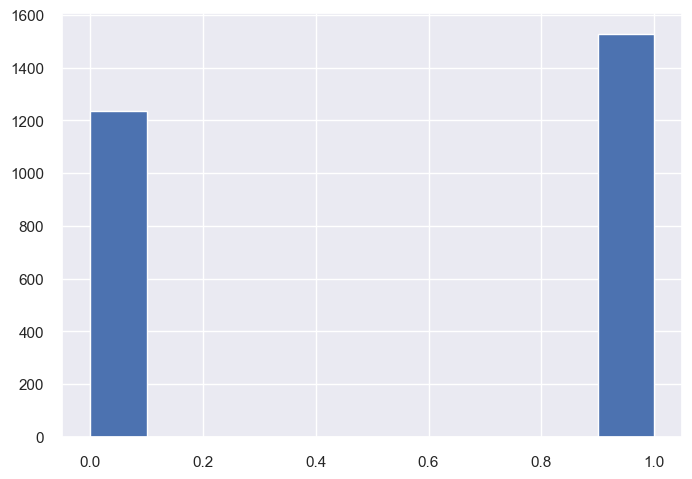

In [112]:
gender_counts = df['Gender'].value_counts()
plt.hist(df['Gender'])

plt.show
print(gender_counts)

Gender: The data and the graph indicate that there are:

- There are 1529 people identified as male.
- Ther are 1235 people identify as female.

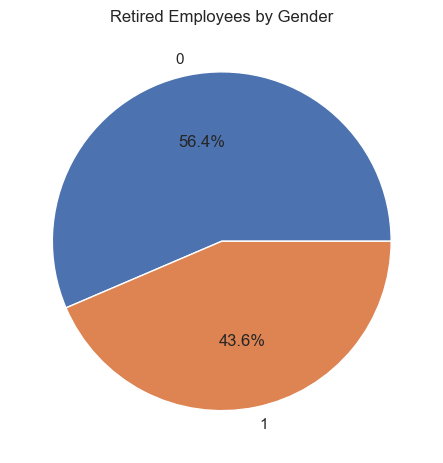

        LeaveOrNot
Gender            
0              614
1              474


In [113]:
retired_df = df[df['LeaveOrNot'] == 1]

leave_counts = retired_df.groupby('Gender')['LeaveOrNot'].count()

plt.pie(leave_counts, labels=leave_counts.index, autopct='%1.1f%%')
plt.title('Retired Employees by Gender')
plt.show()

corr_gender=df.groupby(['Gender'])[['LeaveOrNot']].sum()
print(corr_gender)

According to the Gender graph in conjunction with leaveOrNot, it is found:

- There are 614 people indentify as female who left ther employe within 2 years.
- There are 474 people indentify as male who left ther employe within 2 years.

In [115]:
totalLeave_M = 1529
dropoutLeave_M = 474
dropout_rateM = (dropoutLeave_M / totalLeave_M) * 100

totalLeave_F = 1235
dropoutLeave_F = 614
dropout_rateF = (dropoutLeave_F / totalLeave_F) * 100

print("Male - The dropout rate is:", dropout_rateM, "%")
print("Female - The dropout rate is:", dropout_rateF, "%")

Male - The dropout rate is: 31.000654022236755 %
Female - The dropout rate is: 49.716599190283404 %


Now let's remember...

- Of 1529 people identified as male, 474 left ther job within 2 years. The dropout rate is: 31%.
- Of 1235 people identified as female, 614 left ther job within 2 years. The dropout rate is: 49.72%.

# City

0    1171
2     801
1     792
Name: City, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

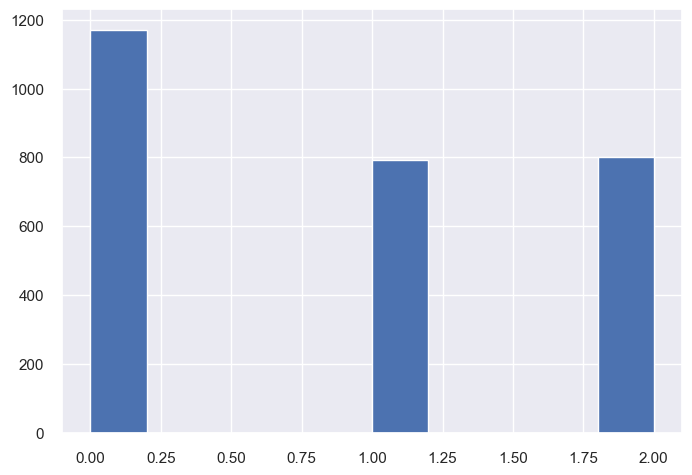

In [116]:
city_counts=df['City'].value_counts()
print(city_counts)

graphic=df['City']
plt.hist(graphic)
plt.show

City: The data and the graph indicate that there are:

- 1171 people were located in Bangalore. 
- 792 people were located in Pune. 
- 801 people were located in New Delhi.

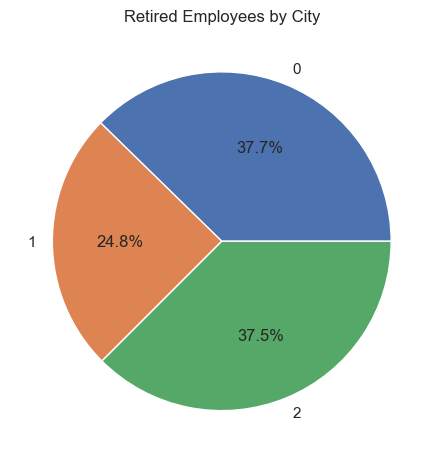

      LeaveOrNot
City            
0            410
1            270
2            408


In [117]:
retired_df = df[df['LeaveOrNot'] == 1]

leave_counts = retired_df.groupby('City')['LeaveOrNot'].count()

plt.pie(leave_counts, labels=leave_counts.index, autopct='%1.1f%%')
plt.title('Retired Employees by City')
plt.show()

corr_city=df.groupby(['City'])[['LeaveOrNot']].sum()
print(corr_city)

According to the City graph in conjunction with leaveOrNot, it is found:

- Of 1088 people who left their job 410 were located in Bangalore.
- Of 1088 people who left their job 408 were located in New Delhi.
- Of 1088 people who left their job 270 were located in Pune.

In [118]:
totalLeave_B = 1171
dropoutLeave_B = 410
dropout_rateB = (dropoutLeave_B / totalLeave_B) * 100

totalLeave_P = 792
dropoutLeave_P = 270
dropout_rateP = (dropoutLeave_P / totalLeave_P) * 100

totalLeave_ND = 801
dropoutLeave_ND = 408
dropout_rateND = (dropoutLeave_ND / totalLeave_ND) * 100

print("Bangalore- The dropout rate is:", dropout_rateB, "%")
print("Pune- The dropout rate is:", dropout_rateP, "%")
print("New- Delhi- The dropout rate is:", dropout_rateND, "%")

Bangalore- The dropout rate is: 35.01280956447481 %
Pune- The dropout rate is: 34.090909090909086 %
New- Delhi- The dropout rate is: 50.936329588014985 %


Now, let's remember...

- There are 1171 record of people who work in Bangalore, in that work location 410 left their job. The dropout rate is: 35.01%.
- There are 792 record of people who work in Pune, in that work location 270 left their job. The dropout rate is: 34.09%.
- There are 801 record of people who work in New Delhi, in that work location 408 left their job. The dropout rate is: 50.91%.

# More correlations will be explored.

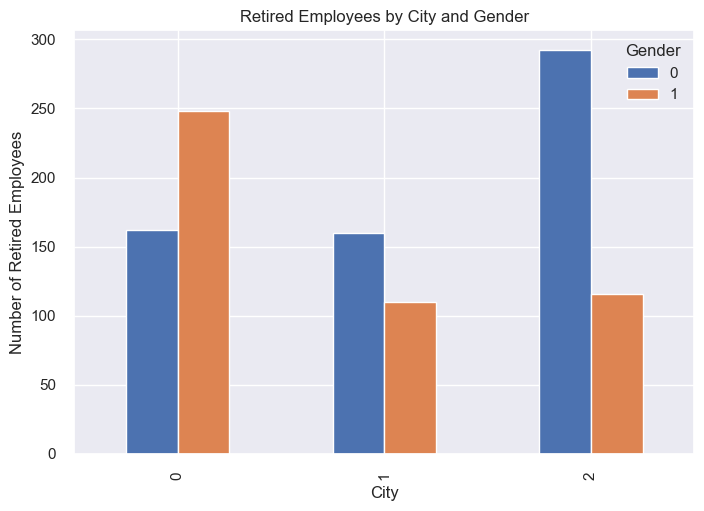

                        LeaveOrNot
City Gender LeaveOrNot            
0    0      0                  266
            1                  162
     1      0                  495
            1                  248
1    0      0                  272
            1                  160
     1      0                  250
            1                  110
2    0      0                   83
            1                  292
     1      0                  310
            1                  116


In [119]:
corr = df.groupby(['City', 'Gender', 'LeaveOrNot'])[['LeaveOrNot']].count()
retired_df = df[df['LeaveOrNot'] == 1]
leave_counts = retired_df.groupby(['City', 'Gender'])['LeaveOrNot'].count()

leave_counts.unstack().plot(kind='bar')
plt.title('Retired Employees by City and Gender')
plt.xlabel('City')
plt.ylabel('Number of Retired Employees')
plt.show()

print(corr)


In [121]:
percentageBM = (248 / 743) * 100
percentageBF = (162 / 428) * 100
percentagePM = (110 / 360) * 100
percentagePF = (160 / 432) * 100
percentageNM = (116 / 426) * 100
percentageNF = (292 / 375) * 100

print(f"In Bangalore the percentage of men who resigned is: {percentageBM:.2f}%")
print(f"In Bangalore the percentage of women who resigned is: {percentageBF:.2f}%")
print(f"In Pune the percentage of men who resigned is: {percentagePM:.2f}%")
print(f"In Pune the percentage of women who resigned is: {percentagePF:.2f}%")
print(f"In New Delhi the percentage of men who resigned is: {percentageNM:.2f}%")
print(f"In New Delhi the percentage of women who resigned is: {percentageNF:.2f}%")

In Bangalore the percentage of men who resigned is: 33.38%
In Bangalore the percentage of women who resigned is: 37.85%
In Pune the percentage of men who resigned is: 30.56%
In Pune the percentage of women who resigned is: 37.04%
In New Delhi the percentage of men who resigned is: 27.23%
In New Delhi the percentage of women who resigned is: 77.87%


In this case, it is found that:

- In Bangalore there are more women than men who after a period of 2 years left their job.
- In Pune there are more women than men who after a period of 2 years left their job.
- In New Delhi there are more women than men who after a period of 2 years left their job.

# 3. Train Test Split

In [122]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [123]:
# test size 20% and train size 80%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# 4. Decision Tree

In [125]:

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [126]:

dtree = DecisionTreeClassifier(random_state=0, max_depth=7, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=2,
                       random_state=0)

In [127]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 77.03 %


In [129]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7703435804701627
Precision Score :  0.7703435804701627
Recall Score :  0.7703435804701627
Jaccard Score :  0.6264705882352941
Log Loss :  8.27765638411913


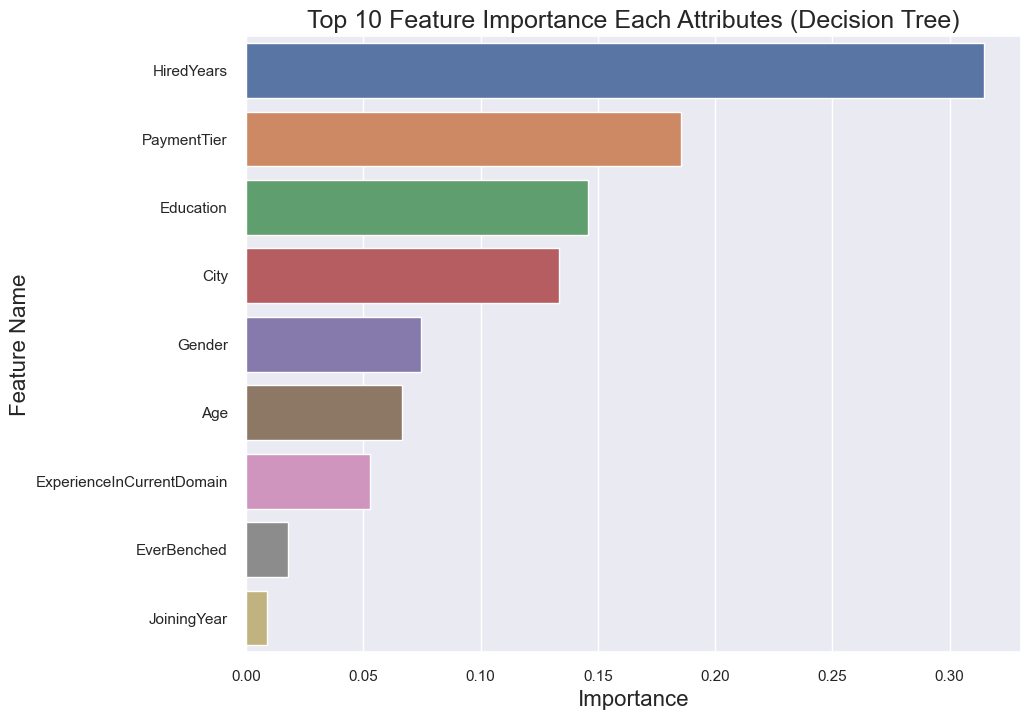

In [130]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7703435804701627')

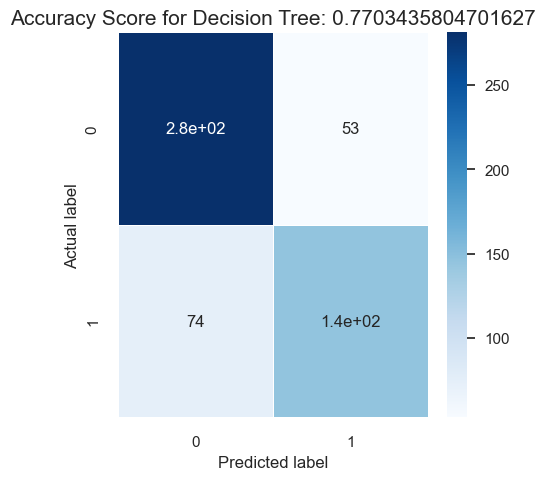

In [134]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


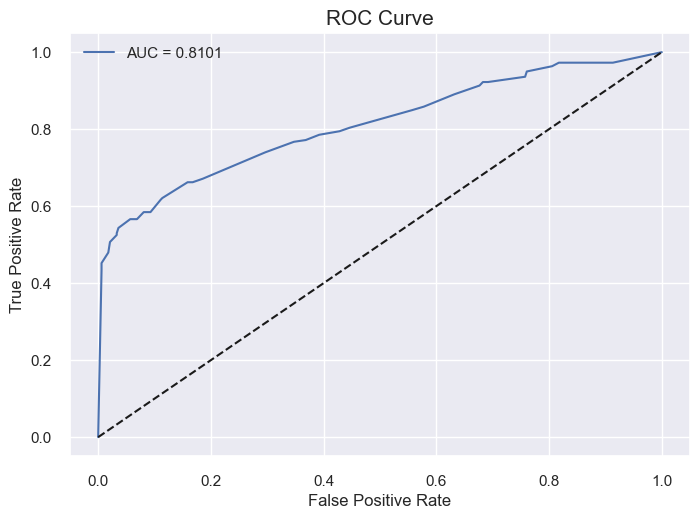

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# 5. Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 5, 'max_features': None, 'n_estimators': 100, 'random_state': 0}


In [141]:

rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, class_weight='balanced', max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [142]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 78.12 %


In [143]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7811934900542495
Precision Score :  0.7811934900542495
Recall Score :  0.7811934900542495
Jaccard Score :  0.6409495548961425
Log Loss :  7.886586003767045


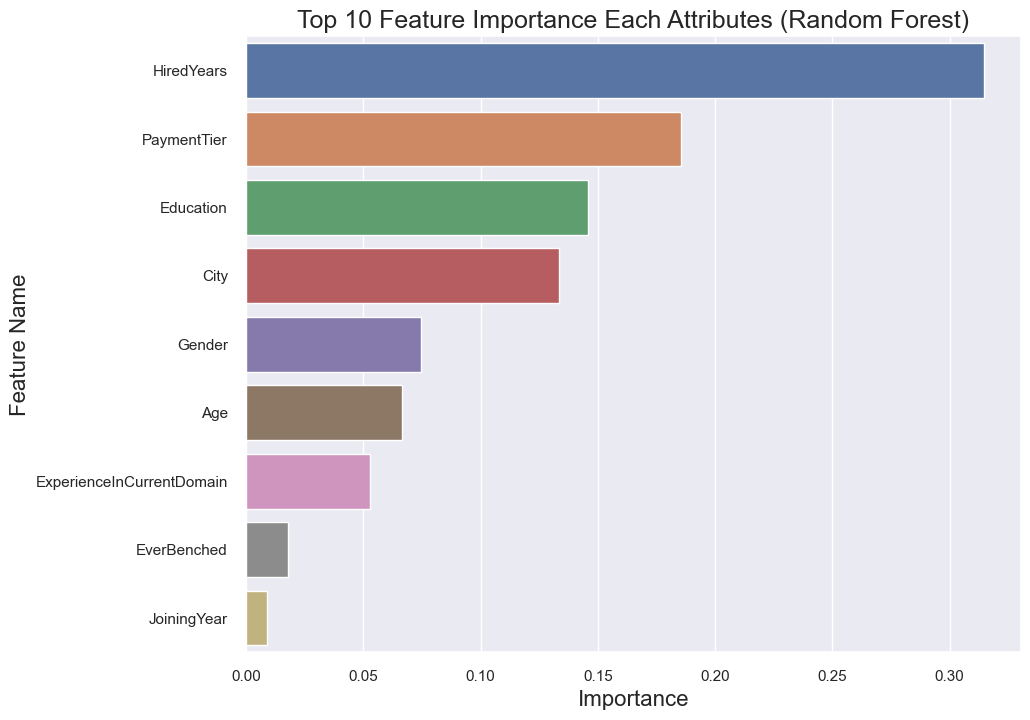

In [144]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.7811934900542495')

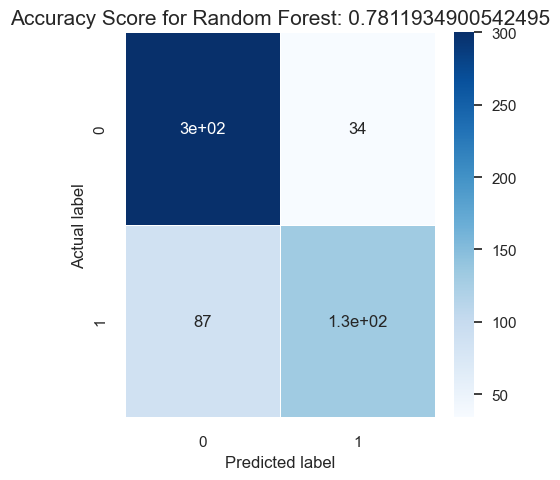

In [147]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

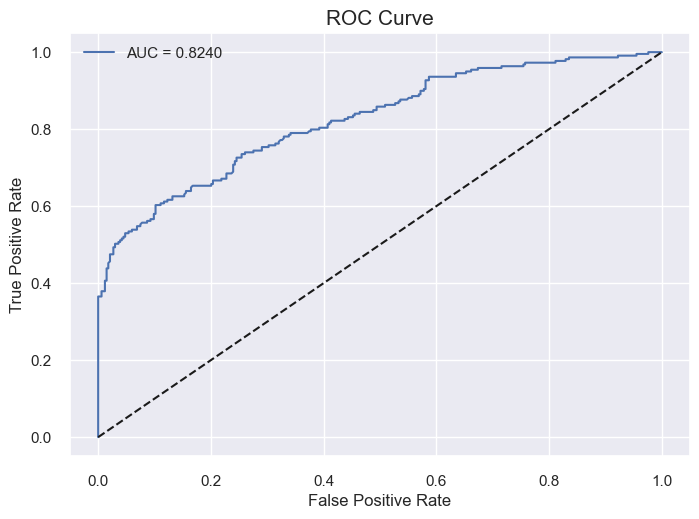

In [148]:

y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# 6. Logistic Regression

In [151]:
log_model = LogisticRegression(C = 0.8, n_jobs=-1, max_iter=1000).fit(X_train, y_train)
y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6473779385171791

# 7. K-Nearest Neighbors algorithm (KNN)

In [154]:
knn_model = KNeighborsClassifier(n_neighbors = 4, n_jobs=-1, leaf_size=10).fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7179023508137432

# 8. Support Vector Classifier (SVC)

In [155]:
svc_model = SVC(C = 0.001, max_iter = 1000).fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6039783001808319

# 9. Some Business Questions.

9.1 How is the Employee strength spread over office locations?

In [161]:
px.histogram(df,x=df['City'],color='Gender',color_discrete_sequence= px.colors.qualitative.D3)

9.2 What is the ratio between males and females in our company?

<Axes: ylabel='Gender'>

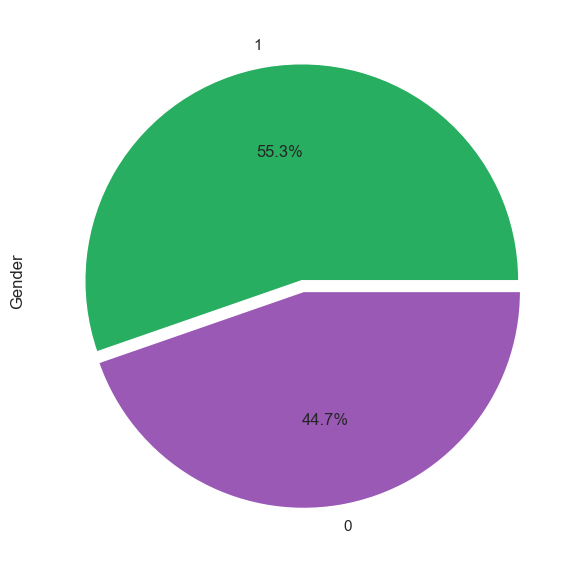

In [163]:
round(df['Gender'].value_counts()/ df.shape[0]*100,2).plot.pie(explode=(0,0.05),autopct = '%1.1f%%',figsize =(7, 10),colors=['#27ae60','#9b59b6'])

9.3 Is there any possible relation between the emplyee's joining year and leaving the company?

In [164]:
px.histogram(dfv,x='JoiningYear',color='LeaveOrNot',barmode='group')

- Most of the emlpoyees joind in 2018 will leave the company.
- What happened in this year? what changes had done?

9.4 What is the ratio between differenet Education levels of employees?

<Axes: ylabel='Education'>

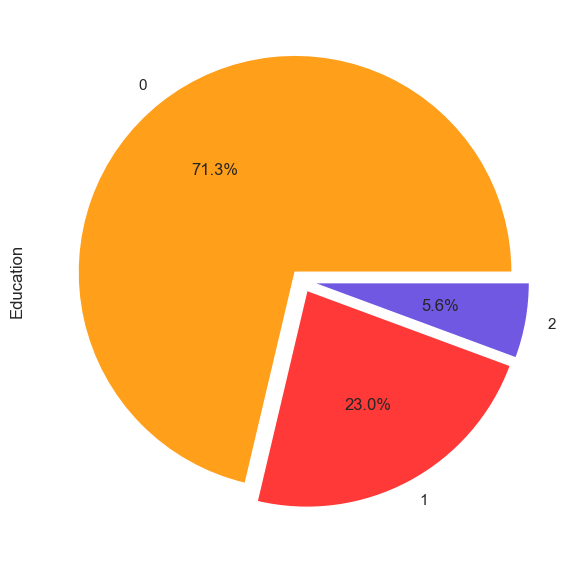

In [165]:
round(df['Education'].value_counts()/ df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%',figsize =(7, 10),explode=(0.05,0.05,0.05),colors=['#ff9f1a','#ff3838','#7158e2'])

9.5 Does the payments have any relation for employees leaving the company?

<Axes: xlabel='PaymentTier', ylabel='count'>

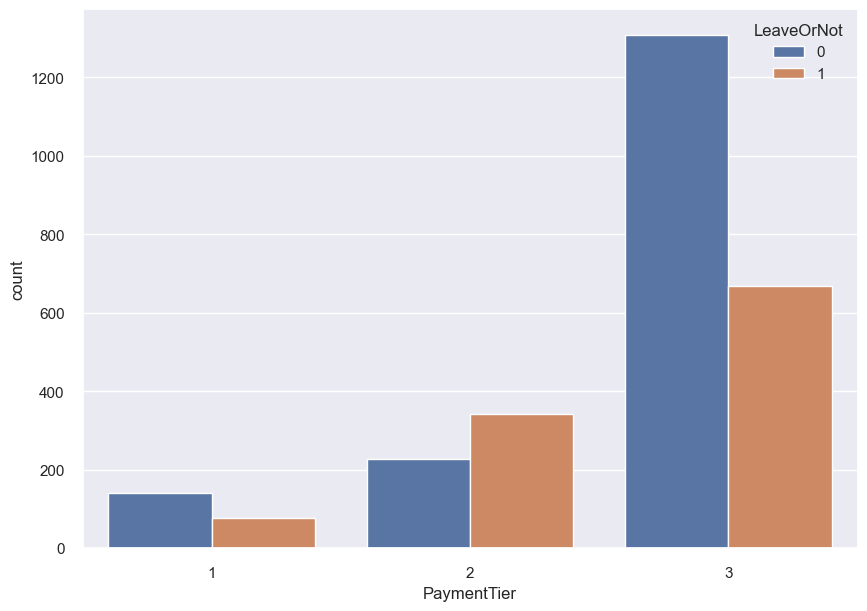

In [166]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x="PaymentTier",hue="LeaveOrNot")

- PaymentTier 2 has more employees to leave while Tier 3 had more to stay
- What makes employees in Tier 2 leaves more? and what makes employees in Tier 3 stay?
- Are the payments in Tier 2 are not satisfying for employees position?

9.6 Could Company location be a factor for employees leaving?

<Figure size 1000x700 with 0 Axes>

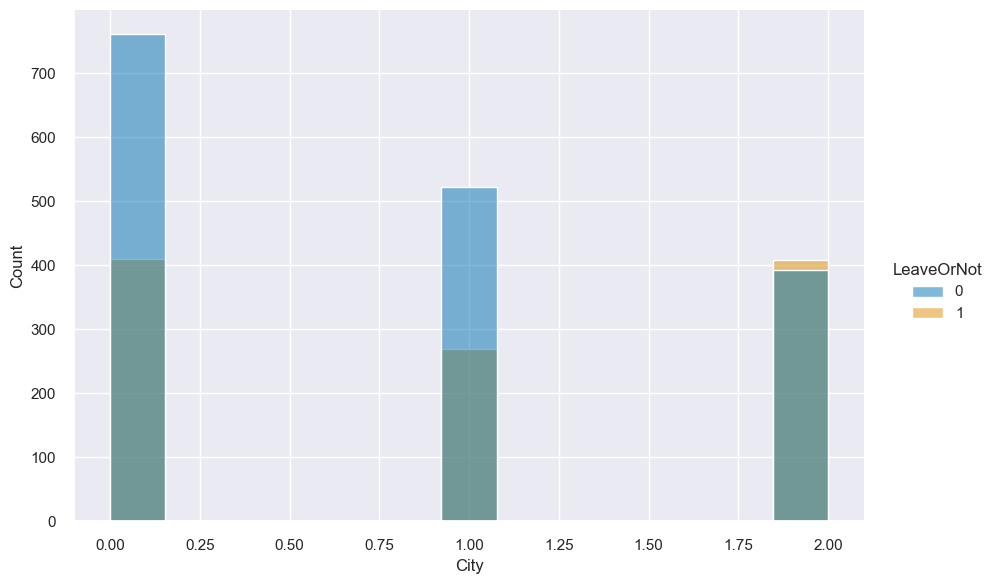

In [167]:
plt.figure(figsize=(10,7))
sns.displot(data=df,x="City",hue="LeaveOrNot",palette='colorblind',height=6,aspect=1.5)

- Emlpoyees leave less in 'Bangalore' and 'Pune and more in 'New Delhi'
- What is Bangalore' and 'Pune' doing better than 'New Delhi'?

9.7 Is there a relation between age and leaving the company? 

<Axes: xlabel='Age', ylabel='Count'>

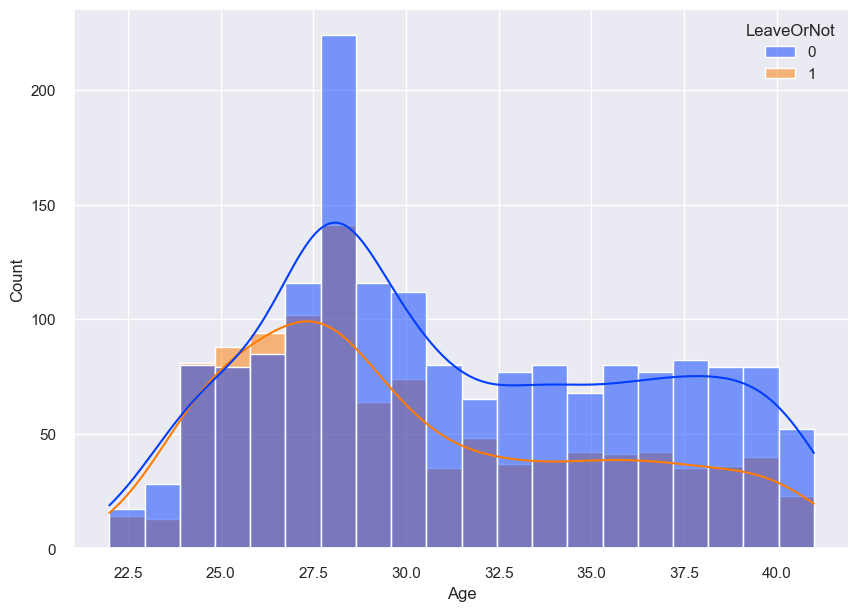

In [168]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x="Age",hue="LeaveOrNot",kde=True,bins=20,palette='bright')

- Employees leave the copmany in almost same ratio for all the ages.
- 'Age' is most likely not a factor.

9.8 Why could employees hired in current year leave the company? is it related with the payments?

<Axes: xlabel='PaymentTier', ylabel='count'>

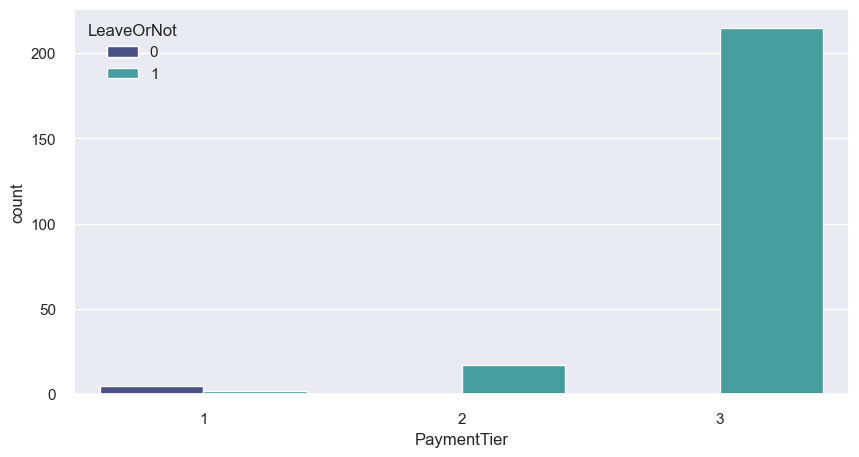

In [176]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['JoiningYear']==2018], x="PaymentTier", hue="LeaveOrNot",palette='mako')

- Most of the employees hired in current year are paid with tier 3
- from question 2 we notice that tier 3 payment over all years wasnt a big of a problem
- Do they miss knowing the payment amounts in their current positions/experience?

9.9 Does Employee's Education affect Payment Tiers?

<Figure size 1000x500 with 0 Axes>

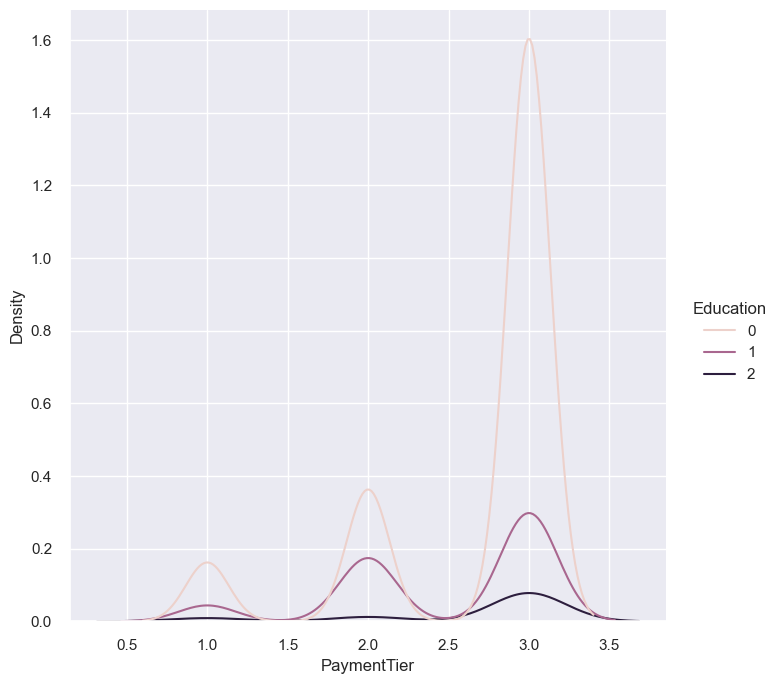

In [172]:
plt.figure(figsize=(10,5))
sns.displot(data=df, x="PaymentTier", hue="Education",height=7,kind='kde')

- Most of employees with Masters education are in tier 3.
- The payment tiers ratio across education is almost the same.

9.10 How does Education level relate to employees leave the company?

<Axes: xlabel='Education', ylabel='count'>

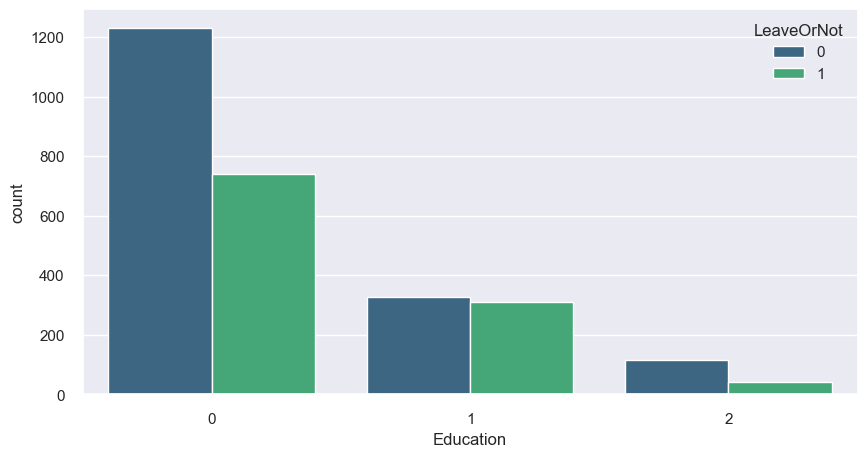

In [173]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Education",hue="LeaveOrNot",palette='viridis')

- More employees with Master degree tends to leave while other education levels have almost the same ratio.